In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
h = 0.01
x_l, x_r = -1, 1
y_l, y_r = -1, 1
k1 = 10
k2 = 10
lx, ly = np.abs(x_r - x_l), np.abs(y_r - y_l)
Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
hx, hy = lx / Nx, ly / Ny

x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx)
y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny)

X, Y = np.meshgrid(x, y, indexing="ij")

In [59]:
def f(x, y, k1, k2):
    return - 2 * (k1 ** 2 + 1) * np.cos(2 * k1 * x) + 2 * (k2 ** 2 + 1) * np.cos(2 * k2 * y)

def phi_l(k1, k2):
    return k1 * np.sin(2 * k1)

def phi_r(k1, k2):
    return k1 * np.sin(2 * k1)

def phi_b(k1, k2):
    return -k2 * np.sin(2 * k2)

def phi_t(k1, k2):
    return -k2 * np.sin(2 * k2)

def real_solution(x, y, k1, k2):
    return np.sin(k1 * x + k2 * y) * np.sin(k1 * x - k2 * y)

In [60]:
def RHS(X, Y, k1, k2, hx, hy):
    res = f(X, Y, k1, k2)
    res[0, :] += phi_l(k1, k2) / hx
    res[-1, :] += phi_r(k1, k2) / hx
    res[:, 0] += phi_b(k1, k2) / hy
    res[:, -1] += phi_t(k1, k2) / hy
    return res

def L(u, hx, hy):
    res = 4 * u
    res[1:, :] += (u[1:, :] - u[:-1, :]) / hx ** 2
    res[:-1, :] += (u[:-1, :] - u[1:, :]) / hx ** 2
    res[:, 1:] += (u[:, 1:] - u[:, :-1]) / hy ** 2
    res[:, :-1] += (u[:, :-1] - u[:, 1:]) / hy ** 2
    
    return res

def L_minus_D(u, hx, hy):
    res = np.zeros_like(u)
    res[1:, :] -= u[:-1, :] / hx ** 2
    res[:-1, :] -= u[1:, :] / hx ** 2
    res[:, 1:] -= u[:, :-1] / hy ** 2
    res[:, :-1] -= u[:, 1:] / hy ** 2

    return res

In [61]:
def D(u, hx, hy):
    D = np.zeros_like(u)
    D += 4
    D[1:, :] += 1 / (hx ** 2)
    D[:-1, :] += 1 / (hx ** 2)
    D[:, 1:] += 1 / (hy ** 2)
    D[:, :-1] += 1 / (hy ** 2)
    return D

In [ ]:
def get_numerical_solution(eps=1e-6, iter=100000, k1=k1, k2=k2, X=X, Y=Y, hx=hx, hy=hy, D=D):
    u = np.zeros_like(X) + 2 * eps
    F = RHS(X, Y, k1, k2, hx, hy)
    D_inv = 1 / D(u, hx, hy)
    for _ in range(iter):
        u_new = D_inv * (F - L_minus_D(u, hx, hy))
        if np.max(np.abs(u - u_new)) < eps:
            break
        u = u_new
    return u

def plot_real_and_numerical_solution(u, X, Y, k1, k2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(u.T, extent=(x_l, x_r, y_l, y_r), cmap='seismic')
    ax[1].imshow(real_solution(X, Y, k1, k2).T, extent=(x_l, x_r, y_l, y_r), cmap='seismic')
    plt.show()
    plt.imshow(np.abs(u - real_solution(X, Y, k1, k2)).T, extent=(x_l, x_r, y_l, y_r), cmap='seismic')
    plt.colorbar()

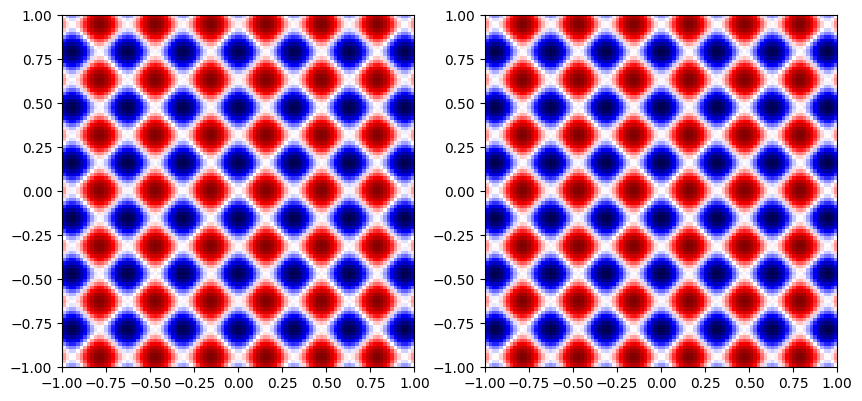

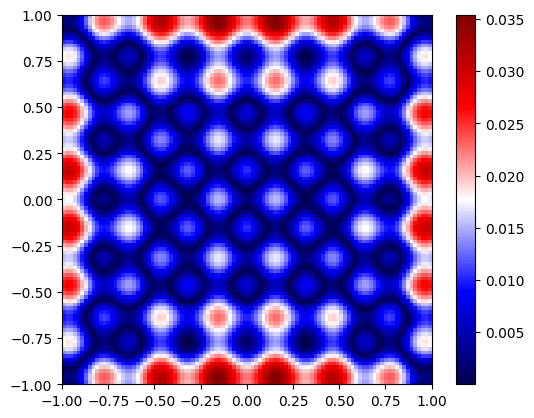

In [63]:
u = get_numerical_solution()
plot_real_and_numerical_solution(u, X, Y, k1, k2)